## DATA-6550 Data Visualization Project
#### Stiven Lavrenov

### Library Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Import Data

In [2]:
df = pd.read_csv('../../Data/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df['Age'].fillna(df['Age'].median(), inplace = True)

---

### Visualizations:

In [5]:
# Processed DataFrames for plotting

df_surv = df[df['Survived'] == 1]
df_nosurv = df[df['Survived'] == 0]

bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '25-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '71-75', '76-80', '80+']
df['AgeGroup'] = pd.cut(df['Age'], bins, labels = labels, include_lowest = True)

#### Good Visualizations:

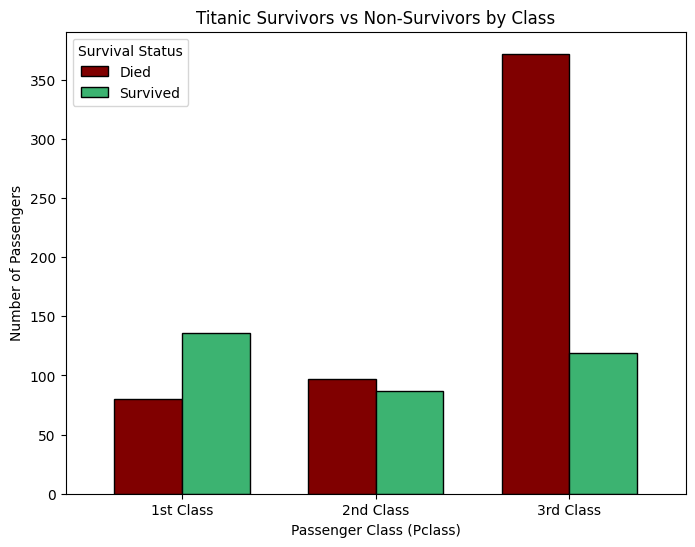

In [42]:
survival_by_pclass = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (8, 6))

survival_by_pclass.plot(kind = 'bar', stacked = False, ax = ax, color = ['maroon', 'mediumseagreen'], width = 0.7, edgecolor = 'black')

ax.set_xlabel('Passenger Class (Pclass)')
ax.set_ylabel('Number of Passengers')
ax.set_title('Titanic Survivors vs Non-Survivors by Class')
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation = 0)

ax.legend(['Died', 'Survived'], title = 'Survival Status', loc = 'upper left')
plt.show()

fig.savefig('pclass-survived')

##### This plot displays the difference in survivors by Passenger Class. This plot shows a clear distinction between the Passenger Classes as well as a clear color distinction on survivors vs. non-survivors for each class, red for those that died and green for survivors. It also follows the logical train of thought on which Passenger Class would have more survivors, with the first-class passengers having more survivors than the second- and third-class passengers.

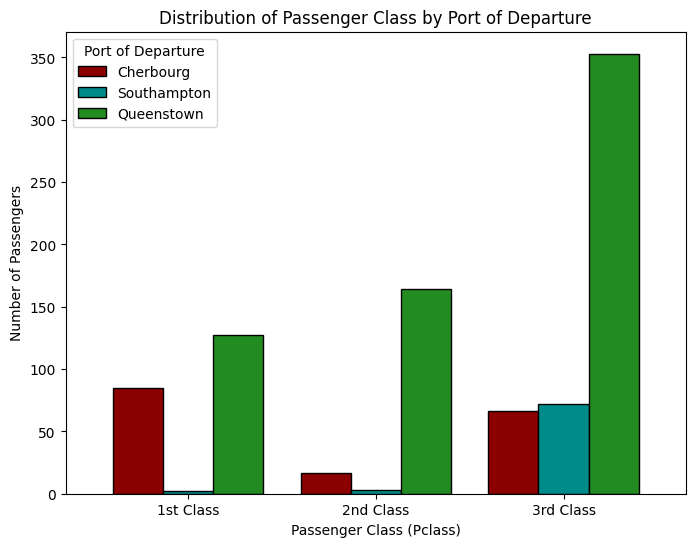

In [41]:
df['Port'] = df['Embarked'].map({'C': 'Cherbourg', 'S': 'Southampton', 'Q': 'Queenstown'})
class_by_port = df.groupby(['Pclass', 'Port']).size().unstack(fill_value = 0)

fig, ax = plt.subplots(figsize = (8, 6))

class_by_port.plot(kind = 'bar', stacked = False, ax = ax, color = ['darkred', 'darkcyan', 'forestgreen'], width = 0.8, edgecolor = 'black')

ax.set_xlabel('Passenger Class (Pclass)')
ax.set_ylabel('Number of Passengers')
ax.set_title('Distribution of Passenger Class by Port of Departure')
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation = 0)

ax.legend(['Cherbourg', 'Southampton', 'Queenstown'], title = 'Port of Departure', loc = 'upper left')
plt.show()

##### This plot displays the distribution of which port passengers departed from and their Passenger Class aboard the Titanic. This plot shows a clear distinction between Passenger Classes, as well as a distinct color separation between the Port of Departure. Looking at this graph, we can see that a majority of passengers departed from Queenstown, and Cherbourg seemed to have the "classiest" passengers, with the most first-class passengers.

---

#### Bad Visualization:

/var/folders/42/5jr766g57bd9bxgy6m30dz880000gn/T/ipykernel_69436/2637676392.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax1.pie(df_surv.groupby('AgeGroup').size(), labels = labels)
/var/folders/42/5jr766g57bd9bxgy6m30dz880000gn/T/ipykernel_69436/2637676392.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax2.pie(df_nosurv.groupby('AgeGroup').size(), labels = labels)


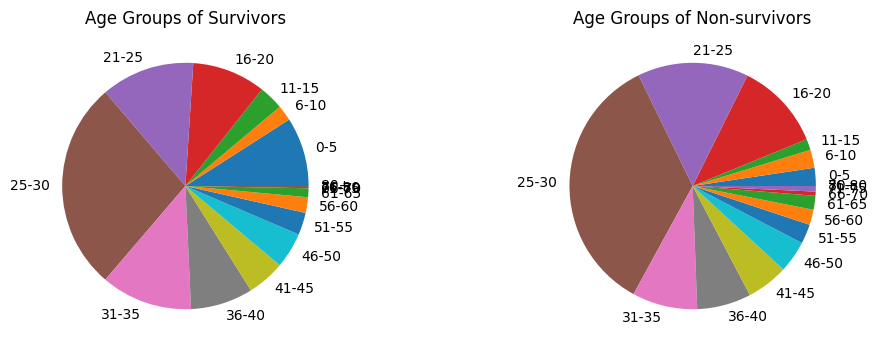

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))

ax1.pie(df_surv.groupby('AgeGroup').size(), labels = labels)
ax1.set_title('Age Groups of Survivors')

ax2.pie(df_nosurv.groupby('AgeGroup').size(), labels = labels)
ax2.set_title('Age Groups of Non-survivors')

plt.show()

##### This plot shows the distribution of Age Groups between those that survived and those that died. Although this plot could be useful to show the distribution of ages groups, the age groups are purposely obtuse and difficult to understand with a pie chart. Because of this, even though we can clearly see which Age Groups mostly survived or died, when it comes to smaller Age Groups, the groupings are much more dense and difficult to understand. This could be remidied by using a bar chart with smaller bins, such as age groups in ranges of 10 or 15.

Text(0, 0.5, 'Gender')

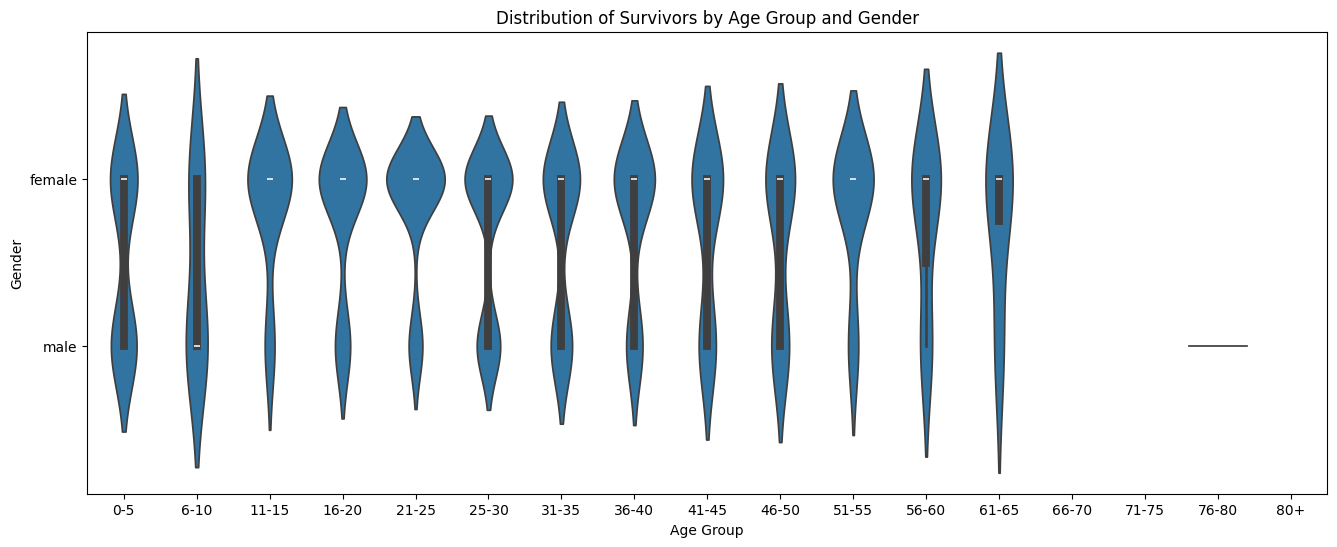

In [27]:
figure = plt.figure(figsize = (16, 6))

sns.violinplot(df_surv, x = 'AgeGroup', y = 'Sex')

plt.title('Distribution of Survivors by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Gender')

##### This plot shows the distrbution of survivors by Age Group and Gender. Even though we can see that women across all Age Groups survived more, this is still a difficult graph to interpret. Using a Violin Plot to show the distribution between the number of Male and Female survivors makes it difficult to truly understand the difference between how many men or women survived, and breaking it out using by Age Group also heightens the confusion. Instead, two bar plots, one for men and one for women, with smaller bins of Age Groups can help mitigate the excessive information on this single graph.

---